In [1]:
from __future__ import division
from additions import contour_plot, training_plots, accuracy, ROC
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in the training data

In [2]:
df_train = pd.read_csv("train_normalized.csv")

In [3]:
x_train = df_train[["period_SNR"]].values
y_train = df_train["class"].values

## Create the sigmoid function by filling in the gaps

In [4]:
def sigmoid(z):
#     Calculate the sigmoid of the argument z and return it
    
    sig = # Fill in here
    
    return sig

SyntaxError: invalid syntax (<ipython-input-4-50c8b2dcde4b>, line 4)

### Run the cell below to get the answer

In [5]:
# %load solutions/sigmoid.py
def sigmoid(z):
#     Calculate the sigmoid of the argument z and return it
    sig = 1./(1+np.exp(-z))
    return sig


## Create the cost function by filling in the gaps

In [6]:
def cost(y, x, W, b):
#     Calculate the argument of the sigmoid
    
    z = # Fill in here
    
#     Calculate the cost and return it
    
    C = # Fill in here
    
    return C

SyntaxError: invalid syntax (<ipython-input-6-048002a39f07>, line 4)

### Run the cell below to get the answer

In [7]:
# %load solutions/cost.py
def cost(y, x, W, b):
#     Calculate the argument of the sigmoid
    z = np.dot(x, W) + b
    
#     Calculate the cost and return it
    C = -np.sum(y*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z)))/len(y)
    
    return C


## Create the cost gradient function by filling in the gaps 

In [8]:
def cost_gradient(y, x, W, b):
#     Calculate the the argument of sigmoid

    z = # Fill in here
    
#     Calculate the derivative of the cost function wrt z

    DcDz = # Fill in here
    
#     Calculate the derivatives wrt each parameter

    DcDW = # Fill in here
    DcDb = # Fill in here
    
    return DcDW, DcDb

SyntaxError: invalid syntax (<ipython-input-8-b67115a327d8>, line 4)

### Run the cell below to get the answer

In [9]:
# %load solutions/cost_gradient.py
def cost_gradient(y, x, W, b):
#     Calculate the the argument of sigmoid
    z = np.dot(x, W) + b
#     Calculate the derivative of the cost function wrt z
    DcDz = y-sigmoid(z)
#     Calculate the derivatives wrt each parameter
    DcDW = -np.dot(DcDz, x)/len(y)
    DcDb = -np.sum(DcDz)/len(y)
    
    return DcDW, DcDb


## Create the gradient descent function by filling in the gaps

In [10]:
def gradient_descent(y, x, Wi, bi, alpha, steps):
#     Create arrays for the weights, bias and cost

    W = # Fill in here
    b = # Fill in here
    C = # Fill in here
    
#   Populate the first entry for each array  

    W[0] = # Fill in here
    b[0] = # Fill in here
    C[0] = # Fill in here
    
#     Perform gradient descent
    for i in range(steps):
        DW, Db = # Fill in here
        
        W[i+1] = # Fill in here
        b[i+1] = # Fill in here
        
        C[i+1] = # Fill in here
        
    return W, b, C

SyntaxError: invalid syntax (<ipython-input-10-2f2ad9b693bc>, line 4)

### Run the cell below to get the answer

In [11]:
# %load solutions/gradient_descent
def gradient_descent(y, x, Wi, bi, alpha, steps):
#     Create arrays for the weights, bias and cost
    W = np.zeros((steps+1, len(Wi)))
    b = np.zeros(steps+1)
    C = np.zeros(steps+1)
    
#   Populate the first entry for each array  
    W[0] = Wi
    b[0] = bi
    C[0] = cost(y, x, Wi, bi)
    
#     Perform gradient descent
    for i in range(steps):
        DW, Db = cost_gradient(y, x, W[i], b[i])
        
        W[i+1] = W[i] - alpha*DW
        b[i+1] = b[i] - alpha*Db
        
        C[i+1] = cost(y, x, W[i+1], b[i+1])
        
    return W, b, C


## Now let's initialize our parameters

In [12]:
np.random.seed(1234)
Wi = np.random.randn(x_train.shape[1])
bi = np.random.randn(1)

## Now let's run the gradient descent algorithm

In [13]:
W, b, C = gradient_descent(y_train, x_train, Wi, bi, alpha=10e-1, steps=100)

## Check out the how the paramters and cost have evolved

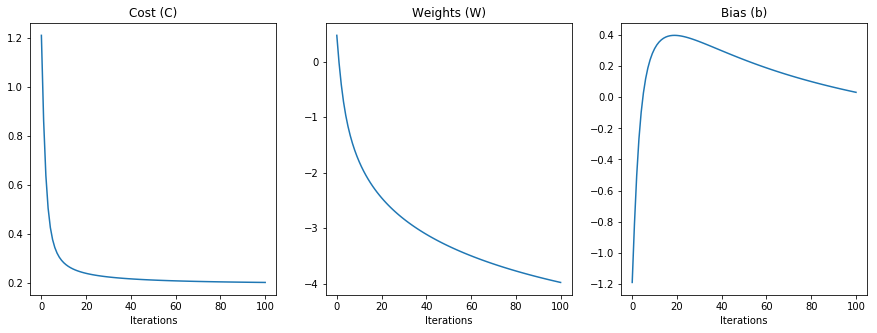

In [14]:
training_plots(W, b, C)

## We can see the path taken by gradient descent nicely on a contour plot of the cost function

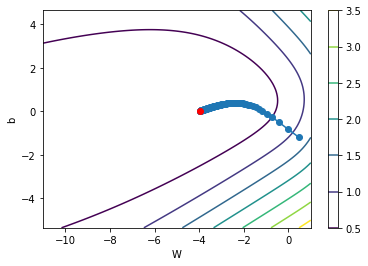

In [15]:
contour_plot(y_train, x_train, W, b);

# Now time to test your classifier

## Load in the test data

In [16]:
df_test = pd.read_csv("test_normalized.csv")

In [17]:
x_test = df_test[["period_SNR"]].values
y_test = df_test["class"].values.astype(int)

In [18]:
acc, pred = accuracy(y_test, x_test, W[-1], b[-1], threshold=0.5)
print(acc)

93.3920704845815


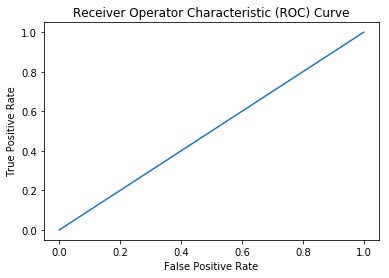

In [20]:
ROC(y_test, x_test, W[-1], b[-1]);